# Lab_2: Using simple classification methods for solving classification problem
# Task:
1. Do data preprocessing & data visualization as it was in the 1st lab work
2. Solve classification problem for the selected dataset.
3. Use `examples/fisher_irises.ipynb` as baseline for your experiments
4. Try to optimize hyperparameters of some model

# Datasets for classification
1. [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)
2. [Fetal Health Classification](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)
3. [Glass Classification](https://www.kaggle.com/datasets/uciml/glass)
4. [Gender Classification Dataset](https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset)
5. [Weather Type Classification](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)
6. [Star Type Classification / NASA](https://www.kaggle.com/datasets/brsdincer/star-type-classification)
7. [Happiness Classification Dataset](https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset)
8. [NASA: Asteroids Classification
Data Collected from NASA API](https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification)
9. [CS:GO Round Winner Classification](https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification)
10. [Heart Disease Classification Dataset](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset)
11. [Early Classification of Diabetes](https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification)
12. [Credit Risk Classification Dataset](https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset)

# Data Set = Star Type Classification

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('src/Stars.csv')

print(df.head())
print(df.info())

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [5]:
print(df.isnull().sum())

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Color"] = label_encoder.fit_transform(df["Color"])
df["Spectral_Class"] = label_encoder.fit_transform(df["Spectral_Class"])
df.head()


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0


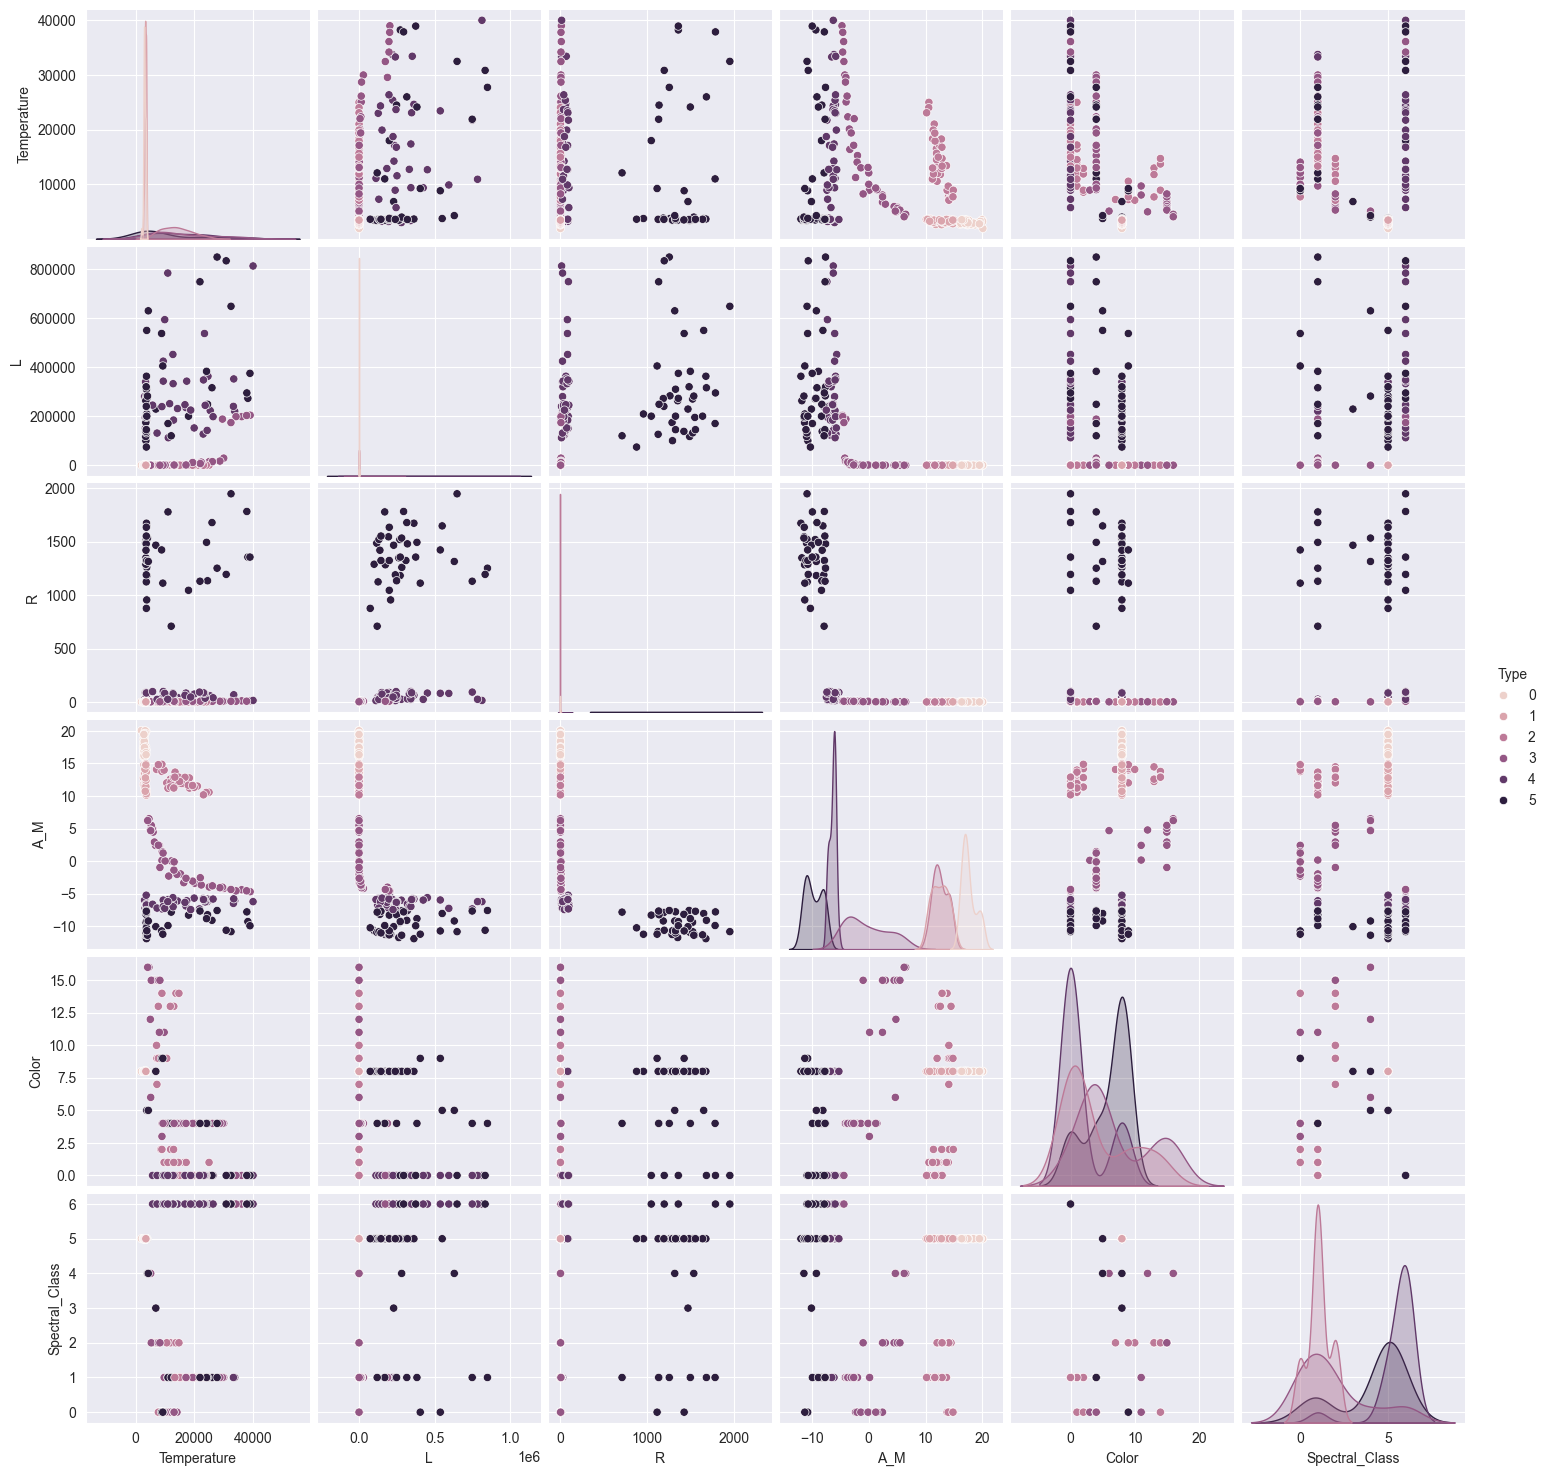

In [13]:
sns.pairplot(df, hue='Type')
plt.show()


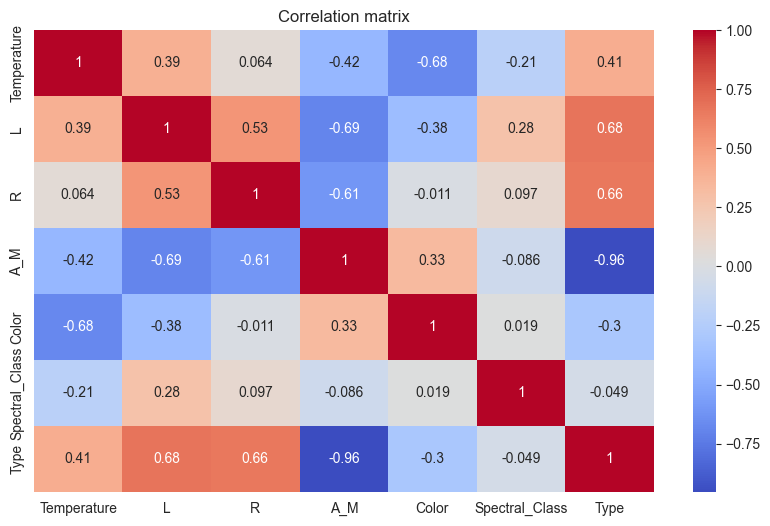

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

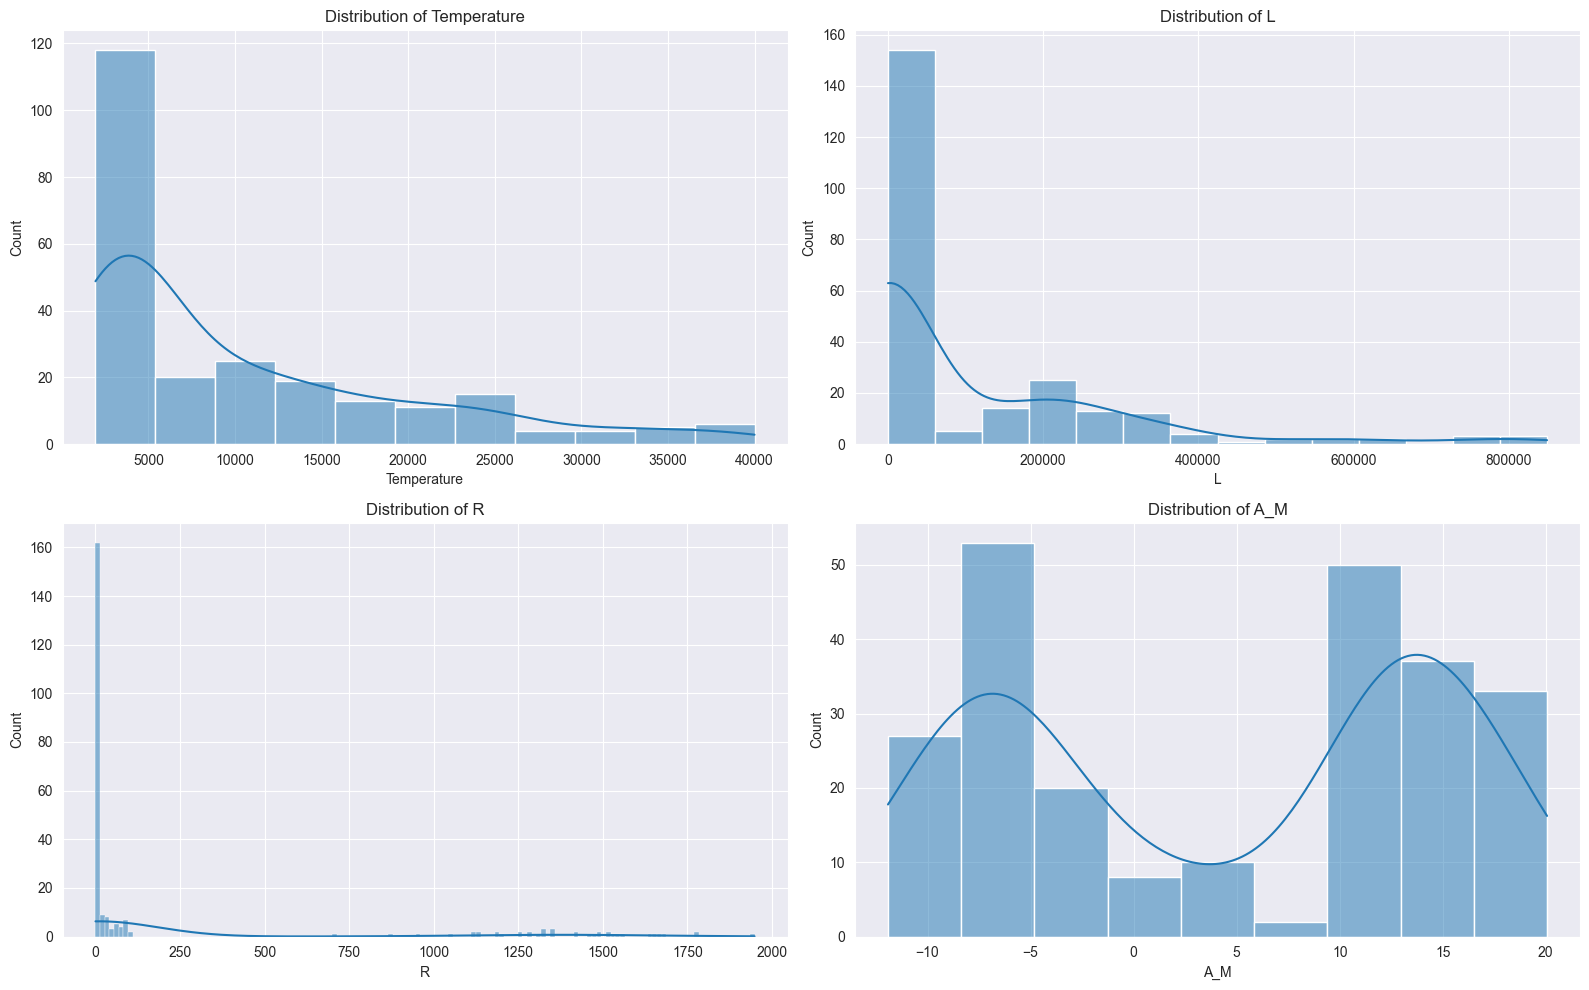

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Temperature', 'L', 'R', 'A_M']

plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

[[ 8  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best result:", grid.best_score_)

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best result: 1.0


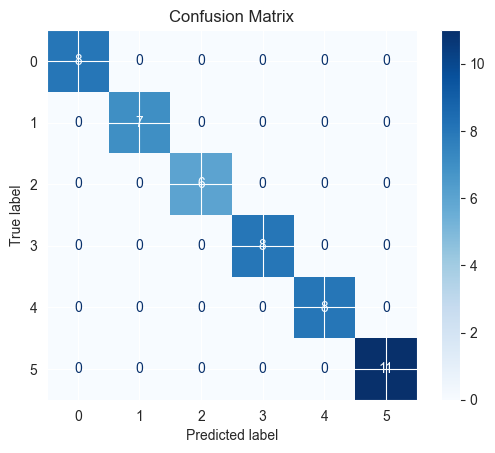

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
